# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [16]:
#Read in data from source 
df_raw = pd.read_csv("https://raw.githubusercontent.com/ga-students/DAT-NYC-43/master/projects/unit-projects/project-1/assets/admissions.csv?token=AU9Myf5KUd7FZQ_77qqeyHnHts84Epf2ks5X-bWqwA%3D%3D")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 400 observations (rows) in the dataset. 

#### Question 2. Create a summary table

In [5]:
df_raw.describe() #function

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: As GRE has a much larger range than GPA, the sum of squared differences from the mean will therefore be much larger for GRE. And since the [number of observations - 1] is equal for both variables, this will result in a larger standard deviation for GRE versus GPA.

#### Question 4. Drop data points with missing data


In [7]:
df_raw = df_raw.dropna()

>**Comments:** you could also drop the missing values from the original dataframe without the need to assign it to a new dataframe object.  Check the documentation for what the optional "inplace" argument does.

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: 
Since the is.null function will return '1' for null or missing values, the sum of the returned values will indicate the number of missing values still present in the data set. Therefore after dropping the missing values, the remaining data set should yield a sum of 0 for each variable as indicated below:

In [8]:
df_raw.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

>**Comments**: nice, concise approach

In [9]:
len(df_raw) # We see that 3 observations have been dropped due to missing values.

397

#### Question 6. Create box plots for GRE and GPA

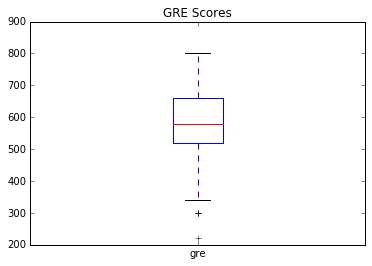

In [125]:
#boxplot 1
df_raw['gre'].plot(kind = 'box', title = 'GRE Scores', ylim = [200,900])

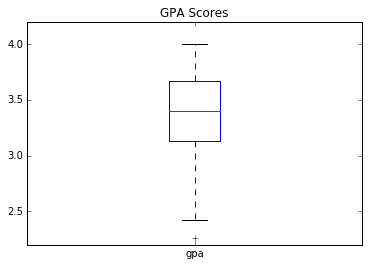

In [126]:
#boxplot 2 
df_raw['gpa'].plot(kind = 'box', title = 'GPA Scores', ylim = [2.2, 4.2])

#### Question 7. What do this [these] plots show?

Answer: (I adjusted the axes so the min and max values are more easily visible). The plots show the reach for both data sets after removing missing data. Whiskers represent (default) 1.5 * interquartile range, and any outliers past that range (GRE scores outside of ~350 to 800, GPA outside of ~2.3 to 4.0) for this data set. In both plots, you can see that the distribution is skewed to the left (more high scores than low scores). This is apparent because the interquartile range is closer to the top than bottom; the effect is more pronounced for GPA scores and a bit more subtle for GRE scores.

>**Comments**: nice use of ylim to adjust axes to make it easier to see the distributions

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BCA3748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BF41780>]], dtype=object)

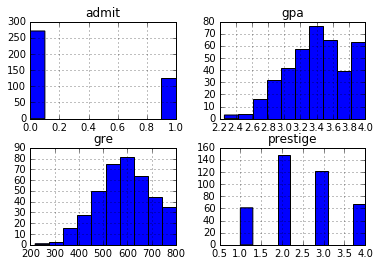

In [10]:
# plot the distribution of each variable 
df_raw.hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, a normal distribution has the properties of being symmetrical (skew = 0). Variables 'gpa' and 'gre' are skewed to the left as depicted above. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, if we are going to be using assumptions under the normal distribution the data's distribution needs to be altered to unskew the data. We can transform the data using a reflected log or reflected square root to 'normalize' the distribution.

>**Comments:** for bonus credit, I see you tried this below... did it help?

#### Question 11. Which of our variables are potentially colinear? 

In [14]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: There isn't really a strong association between any of the variables, the strongest of which is a positive correlation of 0.382 between gre and gpa scores, followed by a negative correlation between rank and admit of -0.244.

>**Comments:** nice.  Given that we care about predicting admit, how should we think differently about correlations between a predictor and admit, and correlations between two predictors (like GPA and GRE)?

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Using this dataset, we wil try to determine if the prestige of undergraduate schools may in part (along with gre and gpa of the applicant) determine grad school admissions rates. The data contains 400 observations of the applicant's gre score, gpa, and prestige (ranked 1 to 4, 1 being of the highest prestige). As a start, we can plot the distributions of the data as a visual guide to see what assumptions we can make, as well as any data transformation that is required to better grasp our data. We will also have to account for any implicit assumptions in the data - such as how rank is determined, to better understand the analysis. We can also use a correlation matrix to see if there is any general association between the variables, positive or negative, and how strong that association is. Since the rank variable is categorical (albeit ordered), dummy variables should be created for each rank to truly see if each rank is associated with admissions. Finally modelling the data will show us the significance of the rank predictor variables, and how much it wlil affect the admission rate.

>**Comments**: very nice, thorough answer.  We haven't covered it in class yet, but given that admit is a binary, what kind of regression might we use?

#### Question 14. What is your hypothesis? 

Answer: The likeliness of being admitted to grad school increase with an applicant's undergraduate school's prestige (lower rank). 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

- Populate missing value with median value of remaining data (within the column). This will not introduce outliers and also use the other data present for that observation in the remaining analysis.
- Map missing value with median value of other data that share the other same known attributes. For example, if GPA is missing but admit = 1, gre = 3.5, and prestige = 2, find all other data points sharing those 3 other values and fill this missing value with median of those data points.
- Try to calculate missing value using multiple regression. After determining the coefficients for each variable, determine the missing value that would fit the regression. However this method would only be feasible if the observations are missing only one value.

>**Comments:** good idea to use imputation, and it's also great that you've thought through the implications of just using the median for the full dataset.  Be careful on parts 2 and 3, though: if we're trying to understand how GRE / GPA / prestige affect admit, we can't use admit to impute missing values for the other three.  The intuition is that if we were trying to predict admission from the other three, we wouldn't already have a value for admit to use to impute missing values on the other three.  Happy to chat about this further if you want!

#### 2. Bonus: Log transform the skewed data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BDD0978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CF78588>]], dtype=object)

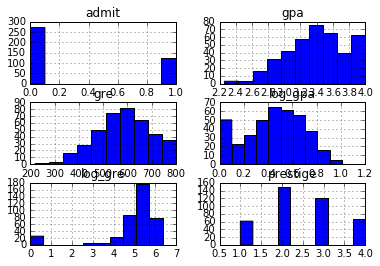

In [15]:
df_raw['log_gre'] = np.log(801 - df_raw['gre'])
df_raw['log_gpa'] = np.log(5 - df_raw['gpa'])
df_raw.hist()

#### 3. Advanced: Impute missing data

In [30]:
#read in data again from Step 2 so the missing values aren't dropped yet
df_raw = pd.read_csv("https://raw.githubusercontent.com/ga-students/DAT-NYC-43/master/projects/unit-projects/project-1/assets/admissions.csv?token=AU9Myf5KUd7FZQ_77qqeyHnHts84Epf2ks5X-bWqwA%3D%3D")
df_raw = df_raw.fillna(df_raw.median())

In [ ]:
df_raw.isnull().sum() #check if any missing values left

>**Comments:** Very nicely answered

## Feedback
Great work!


| Requirements | Incomplete (0) | Does Not Meet Expectations (1) | Meets Expectations (2) | Exceeds Expectations (3) |
|---|---|---|---|---|
| Read in your dataset, determine how many samples are present, and ID any missing data | | |X | |
| Create a table of descriptive statistics for each of the variables (n, mean, median, standard deviation) | | |X | |
| Describe the distributions of your data | | | X| |
| Plot box plots for each variable | | | X| |
| Create a covariance matrix | | |X | |
| Determine any issues or limitations, based on your exploratory analysis | | | X| |
| Outline exploratory analysis methods | | | | X|